# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?



A decision tree in machine learning is like a flowchart that makes decisions by asking a series of questions. It starts at the top with the full dataset and splits it based on the feature that best separates the data, like “Is age > 30?” Each split creates branches, and the process continues until the tree reaches a conclusion, like predicting a category or number. The goal is to keep splitting in a way that makes each group as pure as possible, meaning the answers in each group are mostly the same. It’s a simple and powerful way to make predictions based on patterns in the data.

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

Decision trees handle non-linear relationships naturally because they don’t assume any specific mathematical form between the input and output. Instead, they split the data into regions based on feature values, which makes them flexible in capturing complex patterns and interactions between variables.

In contrast, linear models assume a straight-line relationship between inputs and outputs. They struggle with non-linear relationships unless you manually add polynomial terms or transform features, which requires prior knowledge and can still be limiting.



3. Why is the Gini a good loss function for categorical target variables?

The Gini impurity is a good loss function for categorical target variables because it measures how mixed the classes are within a group. It helps decision trees find splits that create groups with mostly one class, which improves the model's ability to make accurate predictions. A lower Gini value means the group is more pure, while a higher value indicates more class mixing. It is efficient to compute and works well for both binary and multi-class classification problems, making it a practical choice during the tree-building process.


4. Why do trees tend to overfit, and how can this tendency be constrained?

Decision trees tend to overfit because they can keep splitting the data until each leaf perfectly fits the training set, even capturing noise or outliers. This makes the model too specific and less able to generalize to new data. To constrain this tendency, tree depth can be limited, a minimum number of samples can be required to split a node, or pruning techniques can be applied to remove branches that add little predictive value. These strategies help simplify the tree and improve its performance on unseen data.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

False.

While decision trees do handle categorical variables well, they also perform strongly with numerical features. Trees split numerical variables by choosing thresholds (like "is age > 45?"), allowing them to capture both simple and complex patterns in continuous data. Decision trees are thus even used in datasets with only numerical variables. Their ability to handle non-linear relationships and interactions between variables makes them versatile, regardless of whether the features are categorical or continuous.


6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

Most versions of classification and regression trees use binary splits because even though only having two options may intuitively feel constricting, it still offers a good balance of simplicity, flexibility, and performance. With only two branches per split, the tree can create more precise and adaptable decision boundaries by combining multiple simple decisions. This structure is easier to interpret and faster to compute, especially when dealing with numerical variables. Allowing more than two branches can lead to overly complex trees that overfit the data, particularly when the dataset is small or contains noise. Binary trees help control this risk while still capturing complex patterns effectively.


7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

You can examine a decision tree for signs of overfitting or underfitting by looking at its structure and how well it performs on different datasets. A very deep tree with many branches and leaves that each contain only a few data points is often a sign of overfitting, as the model may be memorizing the training data instead of learning general patterns. If the tree performs very well on training data but poorly on validation or test data, that is another sign of overfitting. On the other hand, if the tree is very shallow, has only a few splits, and performs poorly on both training and test data, it is likely underfitting and too simple to capture the underlying structure of the data.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [6]:
url = "http://raw.githubusercontent.com/deancuva/trees/refs/heads/main/assignment/data/cars_hw.csv"
df = pd.read_csv(url)

num_rows, num_columns = df.shape
print(f"Observations: {num_rows}, Features: {num_columns}")

print("Variables:", df.columns.tolist())

print(df.head())




Observations: 976, Features: 12
Variables: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.


In [9]:
df = df.drop(columns=['Unnamed: 0'])

categorical_cols = ['Make', 'Color', 'Body_Type', 'No_of_Owners',
                    'Fuel_Type', 'Transmission', 'Transmission_Type']
numeric_cols = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
target = 'Price'

df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)
X = pd.concat([df_encoded, df[numeric_cols]], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (780, 45), Test shape: (196, 45)


3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?



In [13]:
best_r2 = -float('inf')
best_leaf = None

for leaf in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"min_samples_leaf = {leaf}, R² = {r2:.4f}")
    if r2 > best_r2:
        best_r2 = r2
        best_leaf = leaf

print(f"\nBest min_samples_leaf: {best_leaf} with R² = {best_r2:.4f}")


min_samples_leaf = 1, R² = 0.8190
min_samples_leaf = 2, R² = 0.8031
min_samples_leaf = 3, R² = 0.8016
min_samples_leaf = 4, R² = 0.8138
min_samples_leaf = 5, R² = 0.8253
min_samples_leaf = 6, R² = 0.8035
min_samples_leaf = 7, R² = 0.8017
min_samples_leaf = 8, R² = 0.8041
min_samples_leaf = 9, R² = 0.7971
min_samples_leaf = 10, R² = 0.7941
min_samples_leaf = 11, R² = 0.7970
min_samples_leaf = 12, R² = 0.7823
min_samples_leaf = 13, R² = 0.7831
min_samples_leaf = 14, R² = 0.7771
min_samples_leaf = 15, R² = 0.7806
min_samples_leaf = 16, R² = 0.7710
min_samples_leaf = 17, R² = 0.7725
min_samples_leaf = 18, R² = 0.7706
min_samples_leaf = 19, R² = 0.7499
min_samples_leaf = 20, R² = 0.7496
min_samples_leaf = 21, R² = 0.7505
min_samples_leaf = 22, R² = 0.7502
min_samples_leaf = 23, R² = 0.7334
min_samples_leaf = 24, R² = 0.7328
min_samples_leaf = 25, R² = 0.7269

Best min_samples_leaf: 5 with R² = 0.8253


4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?



R² on test set: 0.8253
RMSE on test set: 141536.54


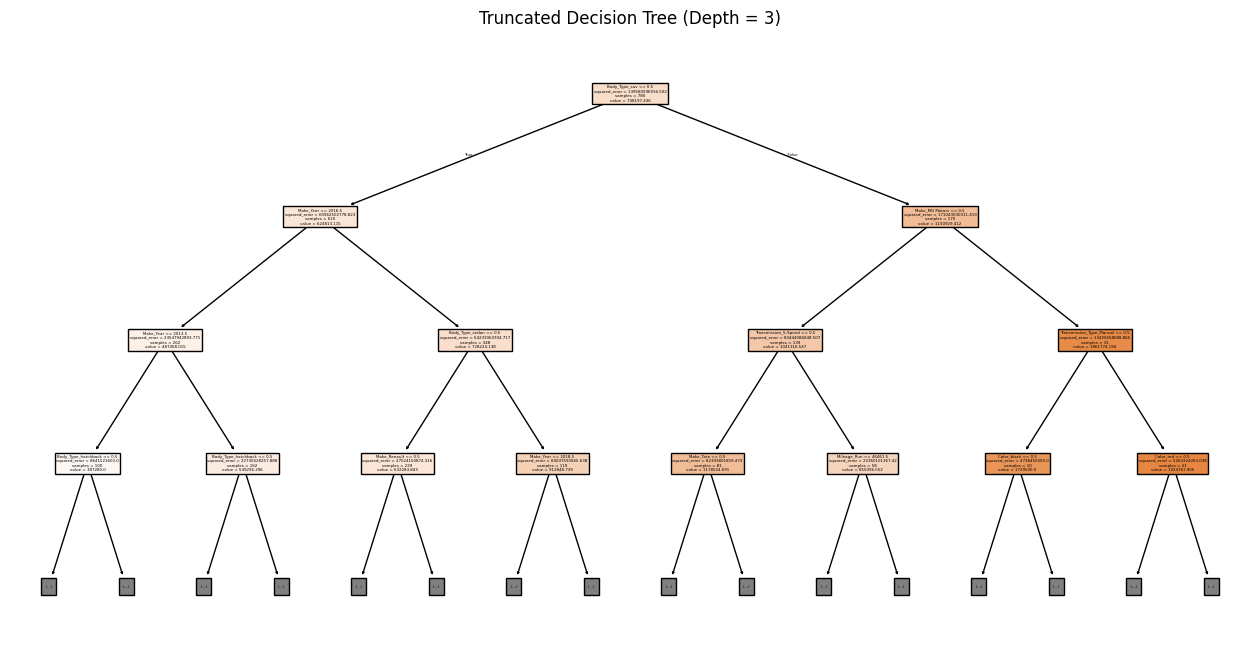

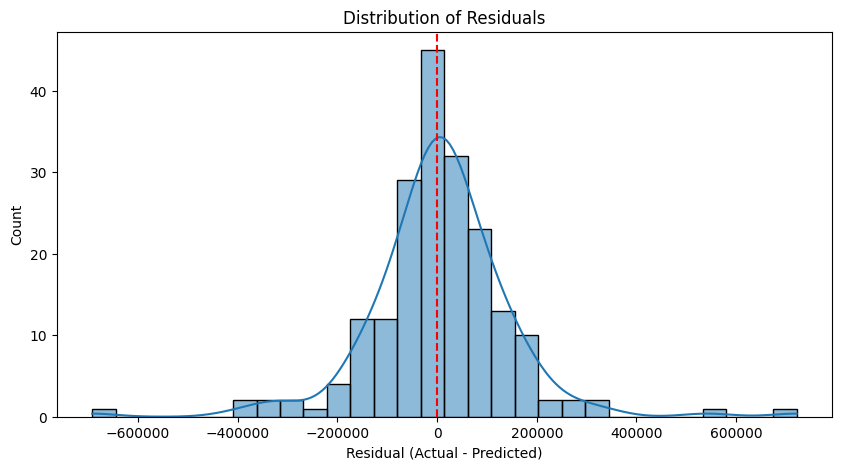

In [16]:
model = DecisionTreeRegressor(min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # ← fixed line

print(f"R² on test set: {r2:.4f}")
print(f"RMSE on test set: {rmse:.2f}")

plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=X.columns, filled=True, max_depth=3)
plt.title("Truncated Decision Tree (Depth = 3)")
plt.show()

residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.axvline(0, color='red', linestyle='--')
plt.show()

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?



In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression - R²: {r2_lr:.4f}, RMSE: {rmse_lr:.2f}")

Linear Regression - R²: 0.8203, RMSE: 143575.20


Both the decision tree and linear regression models performed similarly on the test set, with the decision tree achieving a slightly higher R² (0.8253 vs. 0.8203) and a lower RMSE (141,536.54 vs. 143,575.20). This suggests that while the relationship between the features and car price is largely linear, there are some non-linear patterns or interactions in the data that the decision tree is able to capture more effectively. Overall, the decision tree provides a modest improvement in predictive performance, making it a better choice for this task, especially if capturing subtle patterns is more important than model simplicity.

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

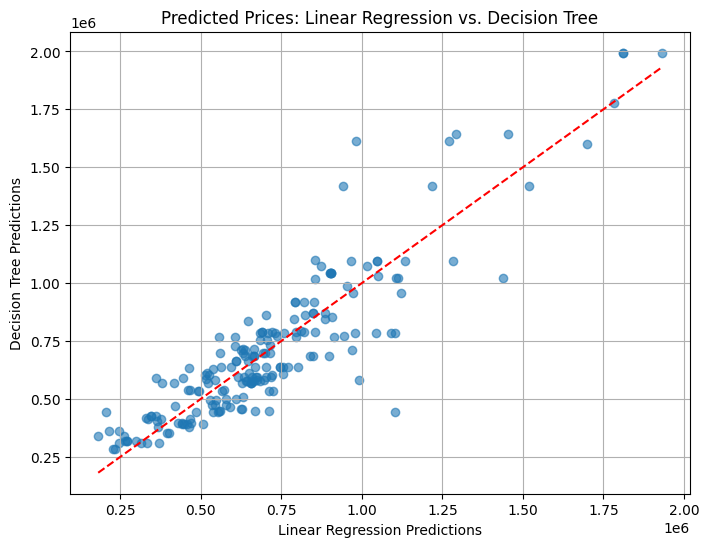

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lr, y_pred, alpha=0.6)
plt.xlabel("Linear Regression Predictions")
plt.ylabel("Decision Tree Predictions")
plt.title("Predicted Prices: Linear Regression vs. Decision Tree")
plt.plot([min(y_pred_lr), max(y_pred_lr)], [min(y_pred_lr), max(y_pred_lr)], 'r--')  # 45-degree line
plt.grid(True)
plt.show()

While both models often produce similar predictions, the decision tree shows more flexibility, especially for high-priced cars. This supports earlier results showing that the tree slightly outperforms linear regression, likely due to its ability to model complex, non-linear relationships that linear regression cannot.

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.



In [28]:
url = "https://raw.githubusercontent.com/deancuva/trees/refs/heads/main/assignment/data/corporate_ratings.csv"
df1 = pd.read_csv(url)

num_rows, num_columns = df1.shape
print(f"Observations: {num_rows}, Features: {num_columns}")

print("Variables:", df1.columns.tolist())

print(df1.head())


Observations: 2029, Features: 31
Variables: ['Rating', 'Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector', 'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding', 'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin', 'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed', 'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover', 'debtEquityRatio', 'debtRatio', 'effectiveTaxRate', 'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare', 'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue', 'enterpriseValueMultiple', 'operatingCashFlowPerShare', 'operatingCashFlowSalesRatio', 'payablesTurnover']
  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.



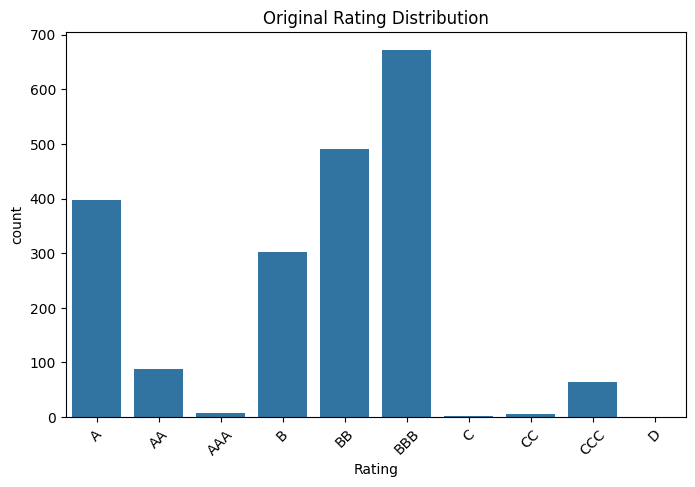

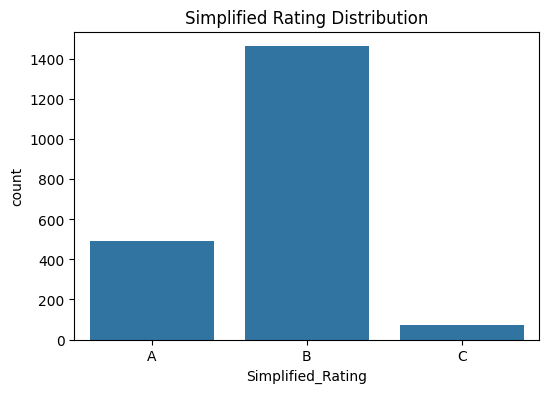

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=df1, order=sorted(df1['Rating'].unique()))
plt.title('Original Rating Distribution')
plt.xticks(rotation=45)
plt.show()

def simplify_rating(rating):
    if rating.startswith('A'):
        return 'A'
    elif rating.startswith('B'):
        return 'B'
    else:
        return 'C'

df1['Simplified_Rating'] = df1['Rating'].astype(str).apply(simplify_rating)

plt.figure(figsize=(6, 4))
sns.countplot(x='Simplified_Rating', data=df, order=['A', 'B', 'C'])
plt.title('Simplified Rating Distribution')
plt.show()


3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.


In [30]:
df1_features = df1.drop(columns=['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name'])

df1_sector = pd.get_dummies(df1_features['Sector'], prefix='Sector', drop_first=True)

df1_features = df1_features.drop(columns=['Sector'])
X = pd.concat([df1_features, df1_sector], axis=1)

print(f"Shape of feature matrix X: {X.shape}")
X.head()


Shape of feature matrix X: (2029, 37)


,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,True,False,False,False,False,False,False,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,True,False,False,False,False,False,False,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,True,False,False,False,False,False,False,False,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,True,False,False,False,False,False,False,False,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,True,False,False,False,False,False,False,False,False,False


4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?


Accuracy: 0.7044


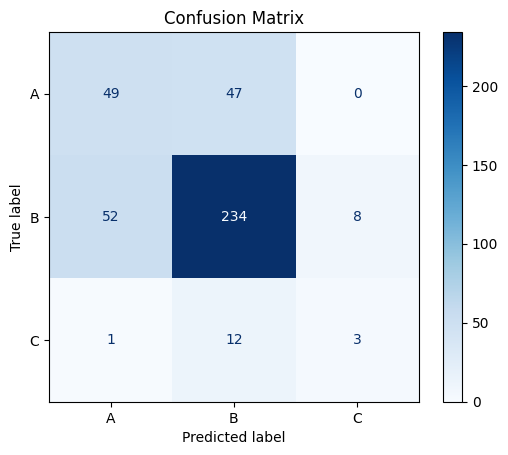

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df1['Simplified_Rating'])

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X = X.select_dtypes(include=['number'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [36]:
df1_features = df1[['Rating Agency Name']].copy()
df1_encoded = pd.get_dummies(df1_features['Rating Agency Name'], prefix='Agency', drop_first=True)

X = pd.concat([X, df1_encoded], axis=1)


Including the rating agency as a predictor allows the model to account for potential differences in how agencies assign ratings. If model performance improves, it suggests that agencies have distinct rating behaviors even when looking at the same financial data, possibly due to differences in methodology, risk tolerance, or interpretation. On the other hand, if the results remain similar, it indicates that the agency label does not add much new information and that ratings are fairly consistent across agencies given the same firm characteristics. Essentially, adding the rating agency helps reveal whether the source of the rating itself influences the pattern of ratings.